<a href="https://colab.research.google.com/github/GabrielBatavia/Learn_TensorFlow/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural netwrok classification with Tensorflow

in this notebook we're going to learn how to write neural netwroks fo classification problems

A classification is where you try to classify something or another

A few type of classification problems :
* Binary classification
* Muliclass classification
* Multilable classification

## Creating data to voew and fit

In [1]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out the features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
# visualize for understand the data

import pandas as pd
circles = pd.DataFrame({"x0":x[:, 0], "x1":x[:, 1], "label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


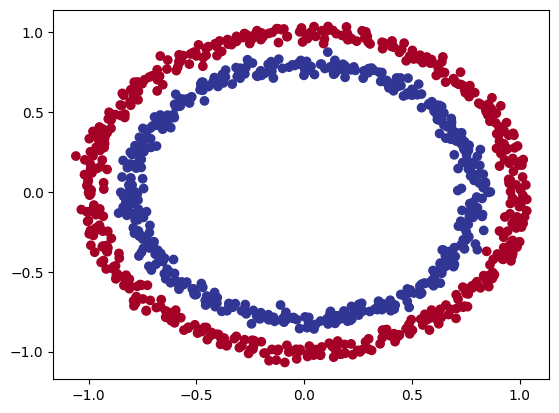

In [5]:
# visualize with plot

import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
x.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working
len(x), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

In [9]:
# import
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [10]:
#Build our traind and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
#check
len(x), len(x_train), len(x_test)

(1000, 800, 200)

In [12]:
x_train

array([[ 0.65794626, -0.46508097],
       [ 0.63194897, -0.7346633 ],
       [-1.00861631, -0.12403051],
       ...,
       [ 0.01574478, -1.02998534],
       [ 1.01102578,  0.16802846],
       [ 0.55778227, -0.57087612]])

In [13]:
# Build the model
tf.random.set_seed(42)

# 1. Create the model
circle_model = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(2)
])

# 2. Compile the model
circle_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics= ["accuracy"])

# 3. Fit the model
history_circle = circle_model.fit(x_train, y_train, epochs=50, verbose=0)

In [14]:
# evaluate model
y_pred_circle = circle_model.predict(x_test)
y_pred_circle[:10]

7/7 [==============================] - 0s 3ms/step


array([[0.269665  , 0.17685477],
       [0.39888138, 0.2712    ],
       [0.1379626 , 0.11681886],
       [0.3061264 , 0.1930915 ],
       [0.46658307, 0.41409722],
       [0.5429172 , 0.4693869 ],
       [0.6462977 , 0.49941984],
       [0.68086857, 0.54659164],
       [0.12429765, 0.10436803],
       [0.41117632, 0.28081056]], dtype=float32)

In [15]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [16]:
# Import
import matplotlib.pyplot as plt

Text(0.5, 0, 'epochs')

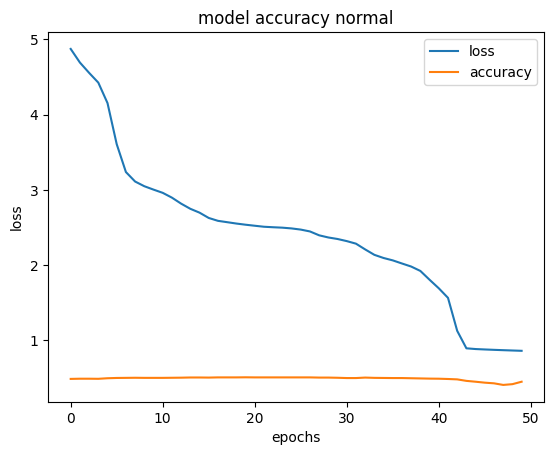

In [17]:
# Plot history (loss curve a or training curve)
pd.DataFrame(history_circle.history).plot()
plt.title("model accuracy normal")
plt.ylabel("loss")
plt.xlabel("epochs")

In [18]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

## Improving our model

Our model still like guessing and still do gambling, we should imrpove the accuracy.

We have trick to improve our model
1. Create a model
2. Compiling the model
3. Fitting a model

In [19]:
# Build the model again
tf.random.set_seed(42)

# 1. Create the model
circle_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
circle_model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["accuracy"])

# 3. Fit the model
history_circle_2 = circle_model_2.fit(x_train, y_train, epochs=50, verbose=0)

Text(0.5, 0, 'epochs')

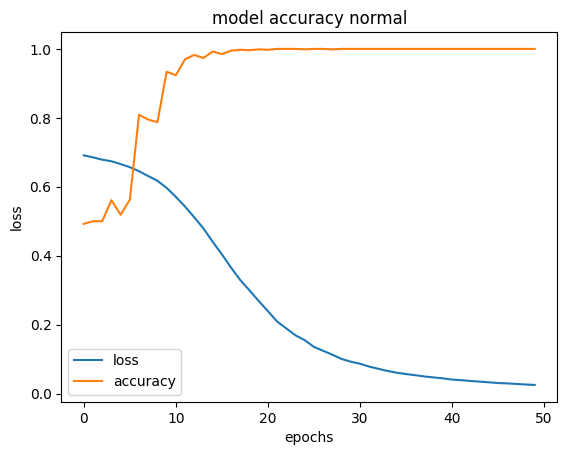

In [20]:
# Plot history (loss curve a or training curve)
pd.DataFrame(history_circle_2.history).plot()
plt.title("model accuracy normal")
plt.ylabel("loss")
plt.xlabel("epochs")

To visualize our model's predict, let's create a function 'plot_decision_boundary()', this function will:

- Take in a trained model, features (x) and labels (y)
- Create a meshgrid of the different x values
- Make predictions across the meshgrid
- Plot the prections as well a line between zones

In [21]:
import numpy as np
np.__version__

'1.25.2'

In [22]:
# Create visualize function for our model predict

def plot_decision_boundary(model, x, y):
  """
  Plots the decision boundary created by a model predicting on x.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create x values
  x_in = np.c_[xx.ravel(), yy.ravel()] # stcak 2d arrays together

  # make predictions
  y_pred = model.predict(x_in)

  # Check for multi_class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

    # plot the decision boundry
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 4ms/step
doing binary classification


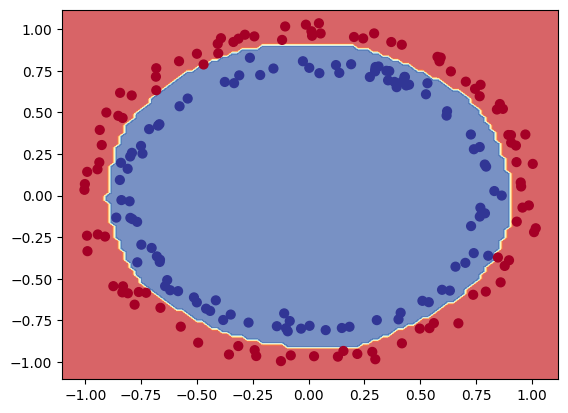

In [23]:
# Check out the predictions our model is making
plot_decision_boundary(circle_model_2, x_test, y_test)

The concept of liniear and non-linear functions (or lines), lets see them in action

In [24]:
# Create a toy a tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

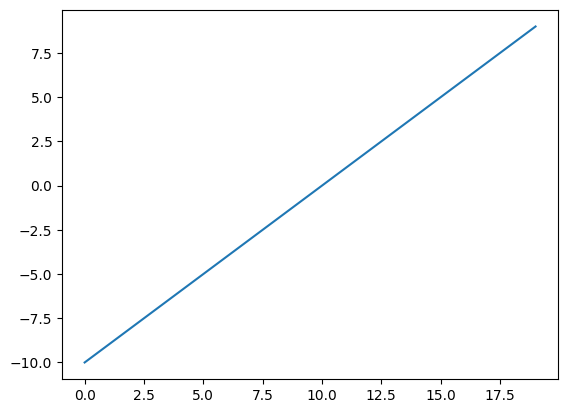

In [25]:
# Visualize our toy tensor
plt.plot(A);

In [26]:
# Lets start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use the sigmoid function to our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

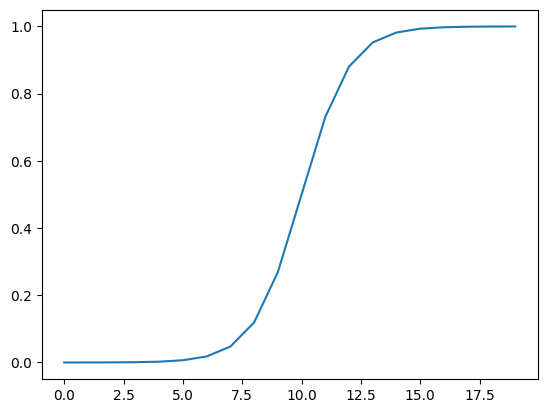

In [27]:
# Plot out toy A tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [28]:
# Lets recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [29]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

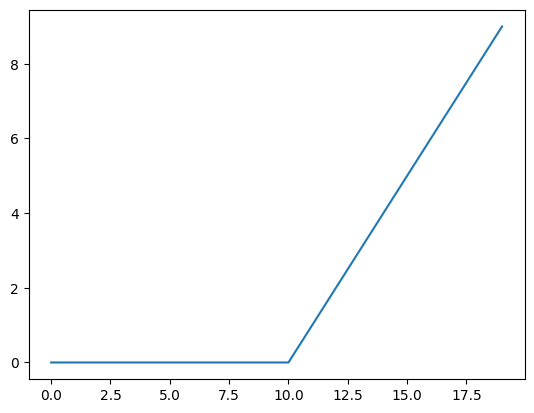

In [30]:
# Plot out toy A tensor transformed by relu
plt.plot(relu(A))

In [31]:
# Lets try to linear activation
linearA = tf.keras.activations.linear(A)

In [32]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

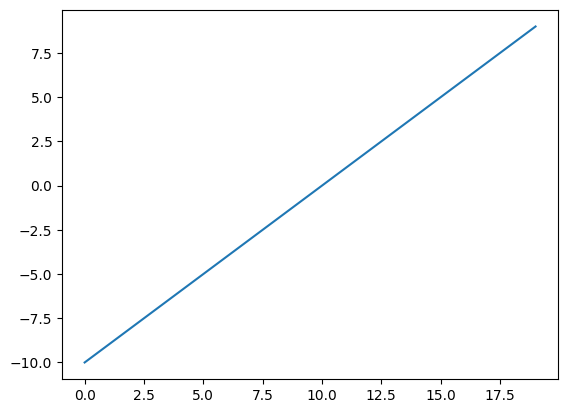

In [33]:
# Check does the liniear function change something
plt.plot(linearA)

In [34]:
A == linearA

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and Imoproving our model

In [35]:
# Check how many example we have (we allready split the dataset)
len(x), len(x_train), len(x_test)

(1000, 800, 200)

In [36]:
x_train.shape, y_train.shape

((800, 2), (800,))

In [37]:
# Lets recreate a model to fit on the training data and evaluate on the test

tf.random.set_seed(42)

# 1. Create the model
circle_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
circle_model_3.compile(loss="binary_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                       metrics=["accuracy"])

# 3. Fit the model
history_circle_3 = circle_model_3.fit(x_train, y_train, epochs=50, verbose=0)

In [38]:
# Evaluate
circle_model_3.evaluate(x_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 1.0000


[0.0059185149148106575, 1.0]

## Plot the loss curves

🔑 **Note:** For many problem, loss fucntion going down its mean our model improving

Text(0.5, 0, 'epochs')

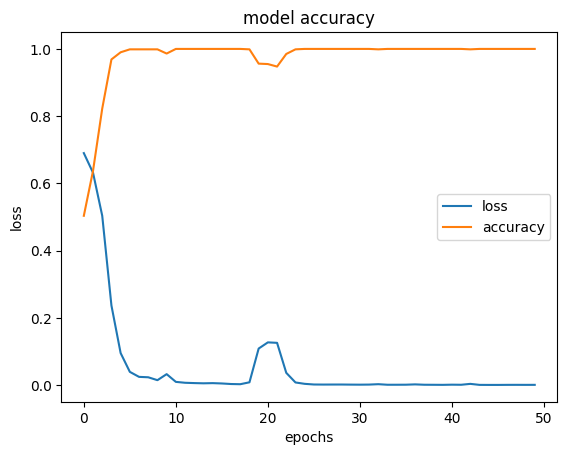

In [39]:
# Plot history (loss curve a or training curve)
pd.DataFrame(history_circle_3.history).plot()
plt.title("model accuracy")
plt.ylabel("loss")
plt.xlabel("epochs")

313/313 [==============================] - 1s 4ms/step
doing binary classification


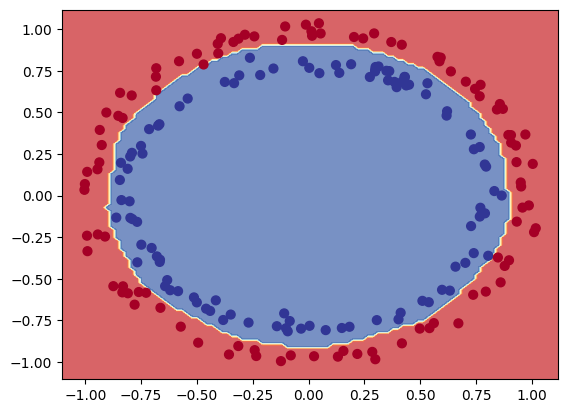

In [40]:
# Check out the predictions our model is making
plot_decision_boundary(circle_model_3, x_test, y_test)

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra pieze of functionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building mdoels here)
* A modified loss cirves plot

In [41]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same circle model)

circle_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
circle_model_4.compile(loss="binary_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                       metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler)
history_circle_4 = circle_model_4.fit(x_train,
                                      y_train,
                                      epochs=50,
                                      verbose=0,
                                      callbacks=[lr_scheduler])

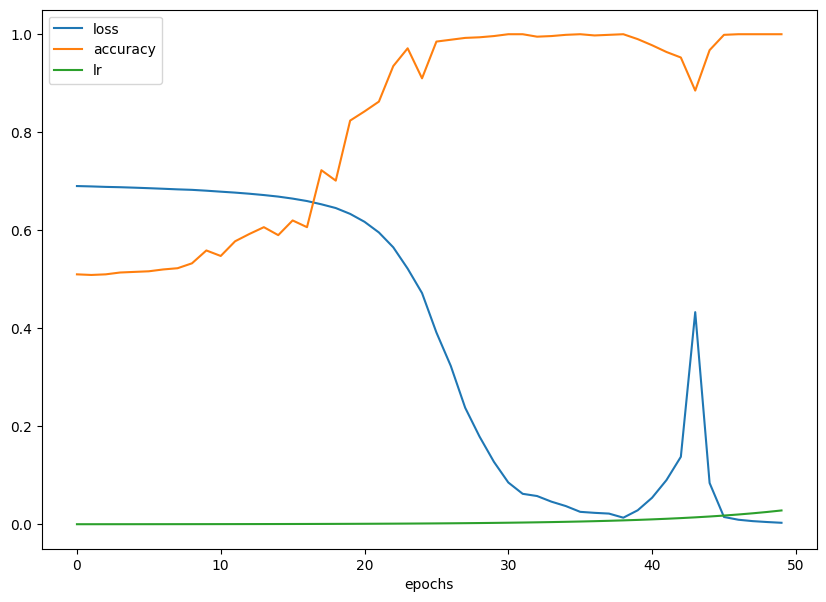

In [42]:
# Checkout the history
pd.DataFrame(history_circle_4.history).plot(figsize=(10, 7), xlabel="epochs");

313/313 [==============================] - 0s 1ms/step
doing binary classification


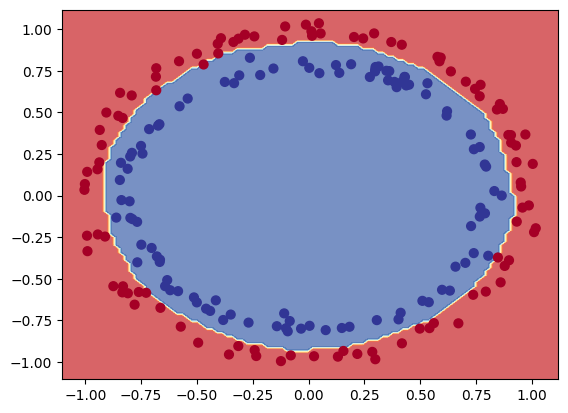

In [43]:
# Check out the predictions our model is making
plot_decision_boundary(circle_model_4, x_test, y_test)

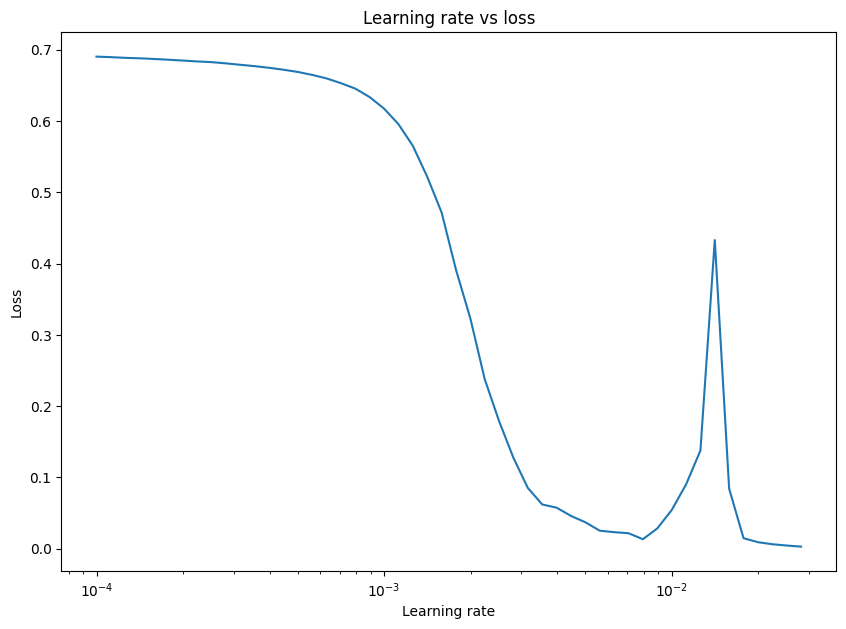

In [44]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(50)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_circle_4.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss");

In [45]:
lrs

<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([0.0001    , 0.0001122 , 0.00012589, 0.00014125, 0.00015849,
       0.00017783, 0.00019953, 0.00022387, 0.00025119, 0.00028184,
       0.00031623, 0.00035481, 0.00039811, 0.00044668, 0.00050119,
       0.00056234, 0.00063096, 0.00070795, 0.00079433, 0.00089125,
       0.001     , 0.00112202, 0.00125893, 0.00141254, 0.00158489,
       0.00177828, 0.00199526, 0.00223872, 0.00251189, 0.00281838,
       0.00316228, 0.00354813, 0.00398107, 0.00446684, 0.00501187,
       0.00562341, 0.00630957, 0.00707946, 0.00794328, 0.00891251,
       0.01      , 0.01122018, 0.01258925, 0.01412538, 0.01584893,
       0.01778279, 0.01995262, 0.02238721, 0.02511886, 0.02818383])>

In [46]:
len(lrs)

50

In [47]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [48]:
# Lets try improve by look which best epochs to our model

# Set random seed
tf.random.set_seed(42)

# Create the model
circle_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
circle_model_5.compile(loss="binary_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                       metrics=["accuracy"])

# Fit the model
history_circle_5 = circle_model_5.fit(x_train, y_train, epochs=32, verbose=0)

In [49]:
# Evaluate
circle_model_5.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 1.0000


[0.010033581405878067, 1.0]

In [50]:
# preview model
circle_model_4.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9950


[0.02148965187370777, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classification


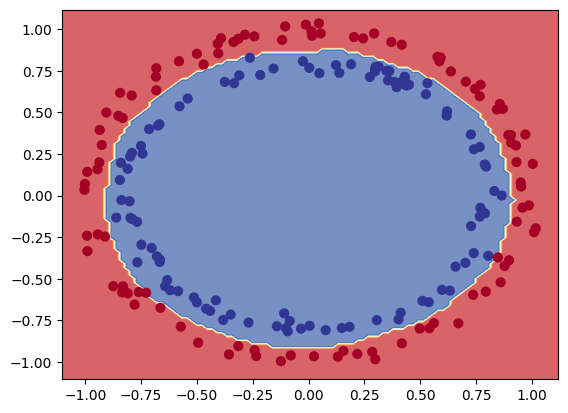

In [51]:
# Check out the predictions our model is making
plot_decision_boundary(circle_model_5, x_test, y_test)

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


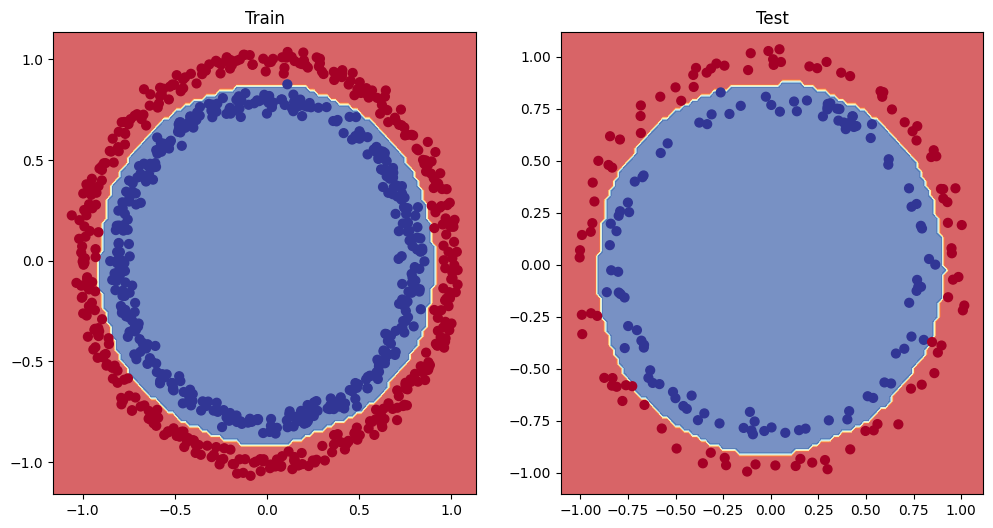

In [52]:
# Plot the decision boundries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(circle_model_5, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(circle_model_5, x_test, y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing our models result as much as possible, there are a handful of other classsification evaluation methods & metrics we should familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [53]:
# Check the accuracy of our model
loss, accuracy = circle_model_5.evaluate(x_test, y_test)
print(f"Model loss on the best test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 1.0000
Model loss on the best test set: 0.010033581405878067
Model accuracy on the test set: 100.00%


How about a confusion matrix?

In [54]:
""" # Get ERROR
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = circle_model_5.predict(x_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)
"""

' # Get ERROR\n# Create a confusion matrix\nfrom sklearn.metrics import confusion_matrix\n\n# Make predictions\ny_preds = circle_model_5.predict(x_test)\n\n# Create confusion matrix\nconfusion_matrix(y_test, y_preds)\n'

In [55]:
y_test[:5]

array([1, 0, 1, 0, 1])

In [56]:
y_preds = circle_model_5.predict(x_test)
y_preds[:5]

7/7 [==============================] - 0s 2ms/step


array([[9.9998081e-01],
       [1.5264088e-05],
       [9.9999970e-01],
       [5.9695884e-07],
       [9.9620682e-01]], dtype=float32)

Oppss... looks like our predictions array has come out in **Predictions probability** form...the standard output from the sigmoid (or softmax) activation function

In [57]:
# Convert prediciton probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [58]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = circle_model_5.predict(x_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 2ms/step


array([[100,   0],
       [  0, 100]])

How about we prettify our confusion matrix?

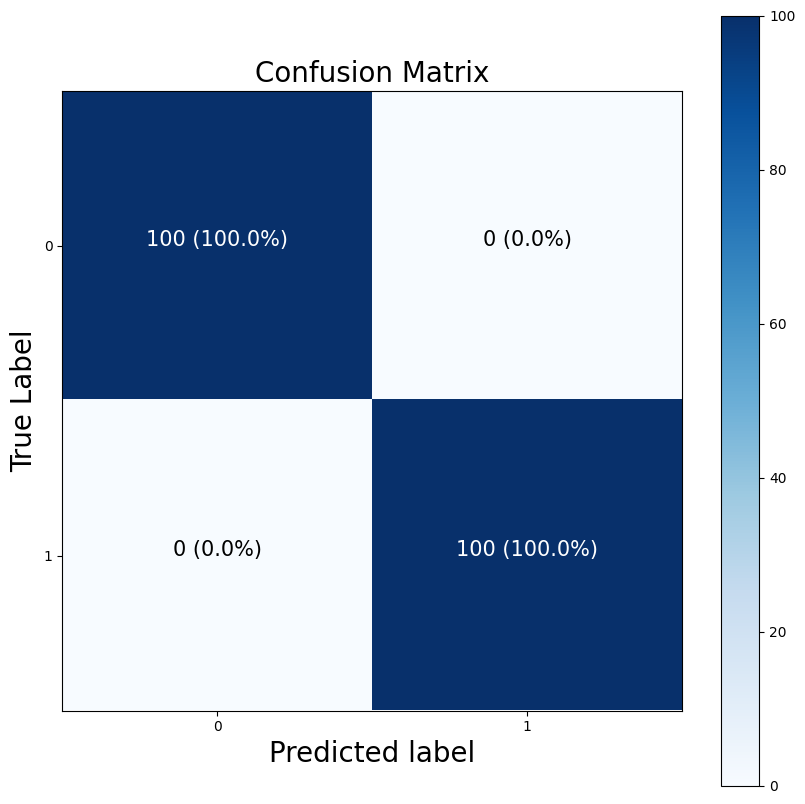

In [59]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Ltes prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set thershold for defferent colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment = "center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)


Exercise : make function for confusion matrix

In [60]:
# make the confusion matrix

def plot_confusion_matrix(model, x, y):
  figsize = (10, 10)

  # Create y_preds
  y_preds = model.predict(x)

  # Create the confusion matrix
  cm = confusion_matrix(y, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # preetify the matrix
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks = np.arange(n_classes),
         yticks = np.arange(n_classes),
         xticklabels = labels,
         yticklabels = labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set thershold for defferent colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment = "center",
             color="white" if cm[i, j] > threshold else "black",
             size=15)

7/7 [==============================] - 0s 2ms/step


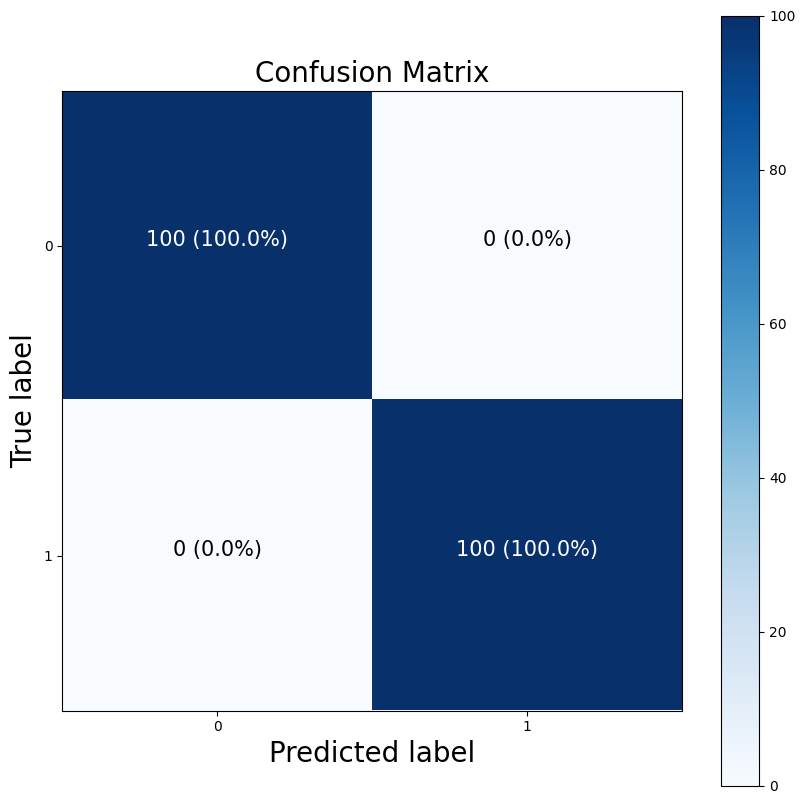

In [61]:
# check the fucntion
plot_confusion_matrix(circle_model_5, x_test, y_test)

# Working with a larger example (multiclass classification)

In [62]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [63]:
# Show the trianing example
print(f"Training sample:\n {train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [64]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

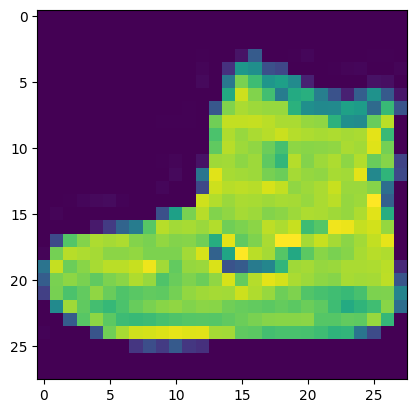

In [65]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [66]:
# Check our sampoles labels
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [67]:
# Create a small list so we can index onto our training labels so human-readable
class_names = ["T-short / top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "	Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Dress')

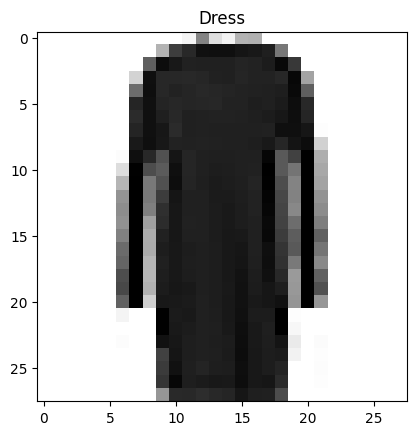

In [68]:
# Plot an example image and its label
index_choice = 4003
plt.imshow(train_data[index_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_choice]])

### Visualize the data image with random plot

This will get us better knowlage about our datasets

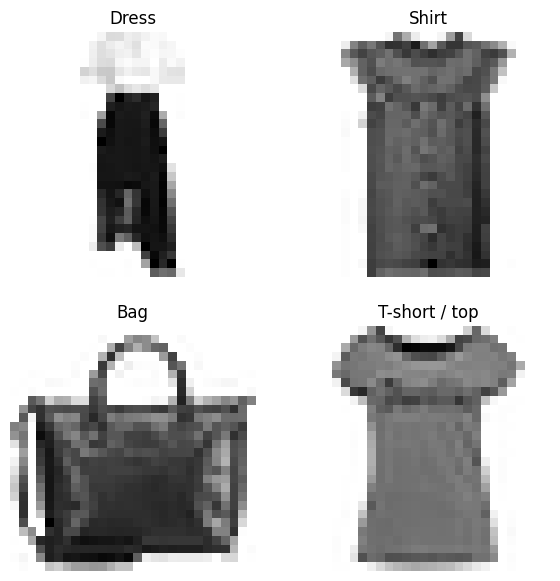

In [69]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Build a multiclass classification model

Its will be same like mostly model that we build before, but we have to have :
* input shape = 28 * 28 (the sahpe of one image)
* Output shape = 10 (one per class of clothing)
* Loss fucntion = tf.keras.losses.CategoricalCrosstentropy()
  * If you labels are one-hot encoded, use CtegoricalCrossentropy()
  * if you labels are integer from use SparseCategoricalCrossentropy()
* Output layers activation = Softmax (not sigmoid)

In [70]:
train_data[0].shape

(28, 28)

In [71]:
len(class_names)

10

In [72]:
# Our data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [75]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_fashion = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_fashion.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

# Fit the model
non_norm_history = model_fashion.fit(train_data,
                                     train_labels,
                                     epochs=10,
                                     validation_data=(test_data, test_labels),
                                     verbose=1)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 2.3964 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy

In [74]:
model_fashion.evaluate

<bound method Model.evaluate of <keras.src.engine.sequential.Sequential object at 0x79a1543be140>>